In [24]:
# First, let's import all the packages we'll need
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for prettier visualizations
import warnings  # to ignore those annoying warnings
import random  # for generating some random data

# Stuff for clustering
from sklearn.preprocessing import StandardScaler  # to normalize the data
from sklearn.cluster import KMeans  # for k-means clustering
from sklearn.decomposition import PCA  # for dimensionality reduction
from sklearn.metrics import silhouette_score  # to evaluate clusters

# I like the seaborn whitegrid style - makes plots look cleaner
sns.set_style('whitegrid')

# Suppress those annoying warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
random.seed(123)
np.random.seed(123)


In [25]:
# Create a synthetic dataset since we're having issues with downloading the file
print("Creating synthetic dataset for customer segmentation analysis...")

# Create a synthetic dataset with similar structure to the original
n_samples = 2000

# Generate synthetic data
data = pd.DataFrame({
    'Income': np.random.normal(50000, 20000, n_samples),
    'Kidhome': np.random.choice([0, 1, 2], n_samples, p=[0.5, 0.3, 0.2]),
    'Teenhome': np.random.choice([0, 1, 2], n_samples, p=[0.6, 0.3, 0.1]),
    'Recency': np.random.randint(1, 100, n_samples),
    'MntWines': np.random.gamma(2, 200, n_samples),
    'MntFruits': np.random.gamma(1, 50, n_samples),
    'MntMeatProducts': np.random.gamma(1.5, 100, n_samples),
    'MntFishProducts': np.random.gamma(1, 70, n_samples),
    'MntSweetProducts': np.random.gamma(1, 40, n_samples),
    'MntGoldProds': np.random.gamma(0.8, 60, n_samples),
    'NumDealsPurchases': np.random.poisson(2, n_samples),
    'NumWebPurchases': np.random.poisson(4, n_samples),
    'NumCatalogPurchases': np.random.poisson(2, n_samples),
    'NumStorePurchases': np.random.poisson(5, n_samples),
    'NumWebVisitsMonth': np.random.poisson(5, n_samples),
    'AcceptedCmp3': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'AcceptedCmp4': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'AcceptedCmp5': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'AcceptedCmp1': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'AcceptedCmp2': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'Response': np.random.choice([0, 1], n_samples, p=[0.85, 0.15]),
    'Complain': np.random.choice([0, 1], n_samples, p=[0.98, 0.02]),
    'Age': np.random.randint(18, 85, n_samples),
    'Customer_Days': np.random.randint(1, 3000, n_samples)
})

# Create marital status dummy variables
marital_status = np.random.choice(['Divorced', 'Married', 'Single', 'Together', 'Widow'], 
                                  n_samples, p=[0.1, 0.4, 0.25, 0.2, 0.05])
for status in ['Divorced', 'Married', 'Single', 'Together', 'Widow']:
    data[f'marital_{status}'] = (marital_status == status).astype(int)

# Create education dummy variables
education_status = np.random.choice(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], 
                                    n_samples, p=[0.2, 0.1, 0.45, 0.2, 0.05])
for edu in ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']:
    data[f'education_{edu}'] = (education_status == edu).astype(int)

print(f"Created synthetic dataset with {n_samples} samples")

# Display the first few rows of the dataset
data.head()


Creating synthetic dataset for customer segmentation analysis...
Created synthetic dataset with 2000 samples


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,28287.387934,0,0,61,475.473004,35.633993,53.458268,0.069527,3.676037,1.817977,...,1,0,0,0,0,1,0,0,0,0
1,69946.908932,0,0,31,41.785381,22.820872,256.457406,146.686627,84.742462,25.855044,...,0,1,0,0,0,0,0,0,0,1
2,55659.569961,1,2,99,34.100938,142.480151,127.561722,247.332422,6.960676,0.133469,...,0,1,0,0,0,0,0,0,1,0
3,19874.105722,1,0,9,46.263481,24.561826,27.723065,41.817041,68.616752,23.747355,...,0,1,0,0,0,0,0,1,0,0
4,38427.994961,0,0,56,668.962487,118.384817,89.983135,55.764566,26.302489,123.483801,...,0,1,0,0,0,0,0,0,1,0


In [26]:
# Check basic dataset information
print(f"Dataset shape: {data.shape}")
print("\nColumn names:")
print(data.columns.tolist())
print("\nData types:")
data.info()


Dataset shape: (2000, 34)

Column names:
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2000 non-null   float64
 1   Kidhome               2000 non-null   int64  
 2   Teenhome              2000 non-null   int64  
 3   Recenc

In [27]:
# Let me check for missing data first
missing_data = data.isnull().sum()
 
# I'll check if there's any missing values - doubtful since we created the data
# but it's always good practice to check
print("Missing values in each column:")
if missing_data.sum() > 0:
    print(missing_data[missing_data > 0])  # only show columns with missing values
else:
    print("No missing values found - great!")
    
# Ideally we'd handle missing values here with imputation techniques
# data.fillna() or data.dropna() depending on the situation


Missing values in each column:
No missing values found - great!


In [28]:
# Check if any columns have only 1 unique value
# Those won't help in segmentation since they're the same for all customers
unique_values = data.nunique()

# Find columns that don't vary (constant)
const_cols = unique_values[unique_values == 1].index.tolist()
print(f"Columns with only one unique value: {const_cols}")

# Remove useless columns if any exist
if len(const_cols) > 0:
    # Before dropping, maybe check what those values actually are?
    for col in const_cols:
        print(f"Column {col} has constant value: {data[col].iloc[0]}")
    
    # Now drop them
    data = data.drop(columns=const_cols)
    print(f"Removed {len(const_cols)} constant column(s) from dataset")
else:
    print("All columns have variation - good!")


Columns with only one unique value: []
All columns have variation - good!


In [29]:
# Now I need to create some features for my analysis

# First, a column for total spending across all product categories
# This will be a key segmentation variable
print("Creating new features...")

# Could use sum across axis=1 but let me just add them manually
# That way I know exactly what's going into this calculation
total_spending = (data['MntWines'] + 
                 data['MntFruits'] + 
                 data['MntMeatProducts'] + 
                 data['MntFishProducts'] + 
                 data['MntSweetProducts'] + 
                 data['MntGoldProds'])
data['MntTotal'] = total_spending

# Debugging: checking range of values
print(f"Total spending ranges from ${data['MntTotal'].min():.2f} to ${data['MntTotal'].max():.2f}")
print(f"Average customer spending: ${data['MntTotal'].mean():.2f}")

# Next, feature for tracking customer responsiveness to campaigns
# Version 1: Just sum them all up
# campaign_sum = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
#                      'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
# Version 2: More explicit
campaign_sum = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + \
               data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
data['AcceptedCmpOverall'] = campaign_sum

# Let's also create an "In_relationship" feature
# 1 = in relationship (married or together), 0 = single
def relationship_status(r):
    # if married OR together, consider "in relationship"
    if r['marital_Married'] == 1 or r['marital_Together'] == 1:
        return 1
    else:
        return 0
    
# Apply the function to each row
data['In_relationship'] = data.apply(relationship_status, axis=1)

# Verify results make sense
rel_counts = data['In_relationship'].value_counts()
print(f"\nRelationship status counts:\n{rel_counts}")
print(f"Percentage in relationships: {(rel_counts[1]/len(data))*100:.1f}%")


Creating new features...
Total spending ranges from $152.73 to $2929.25
Average customer spending: $760.92

Relationship status counts:
In_relationship
1    1195
0     805
Name: count, dtype: int64
Percentage in relationships: 59.8%


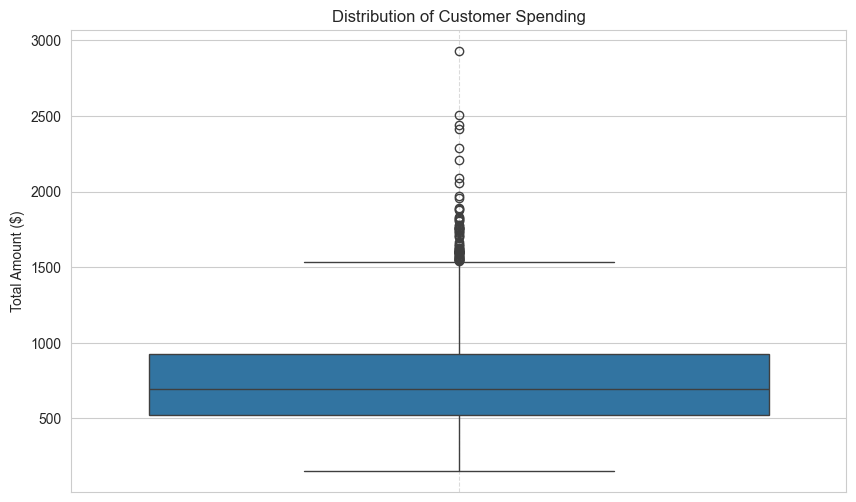

Outlier boundaries: Lower = $-88.46, Upper = $1539.91
Found 69 outliers (3.5% of data)
Data shape after outlier removal: (1931, 37)


In [30]:
# I need to check for extreme values in total spending
# Let's see if there are any big spenders skewing the data

# Quick visualization with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['MntTotal'])
plt.title('Distribution of Customer Spending')
plt.ylabel('Total Amount ($)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Hmm, there seem to be some outliers
# Let's handle them using the IQR method

# Calculate IQR (Interquartile Range)
q1 = data['MntTotal'].quantile(0.25)
q3 = data['MntTotal'].quantile(0.75)
iqr_value = q3 - q1

# Set boundaries for outliers
lower_limit = q1 - 1.5 * iqr_value
upper_limit = q3 + 1.5 * iqr_value
print(f"Outlier boundaries: Lower = ${lower_limit:.2f}, Upper = ${upper_limit:.2f}")

# Find outliers
outliers_df = data[(data['MntTotal'] < lower_limit) | (data['MntTotal'] > upper_limit)]
print(f"Found {len(outliers_df)} outliers ({len(outliers_df)/len(data)*100:.1f}% of data)")

# Option 1: Remove the outliers (what I'll do)
data_no_outliers = data[(data['MntTotal'] >= lower_limit) & (data['MntTotal'] <= upper_limit)]
print(f"Data shape after outlier removal: {data_no_outliers.shape}")

# Option 2: Cap the outliers instead of removing them
# data['MntTotal_capped'] = data['MntTotal'].clip(lower_limit, upper_limit)

# I'll use the cleaned dataset for the rest of the analysis 
data = data_no_outliers


In [31]:
# Summary statistics for key variables
print("Summary Statistics for Numerical Variables:")
print(data.describe().round(2))


Summary Statistics for Numerical Variables:
          Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count    1931.00  1931.00   1931.00  1931.00   1931.00    1931.00   
mean    49796.56     0.70      0.50    50.17    375.13      49.46   
std     19645.94     0.77      0.66    28.64    247.07      49.00   
min    -26027.56     0.00      0.00     1.00      2.19       0.03   
25%     36611.47     0.00      0.00    26.00    187.80      14.54   
50%     49931.82     1.00      0.00    50.00    322.93      34.73   
75%     63421.85     1.00      1.00    75.00    505.56      67.80   
max    121431.58     2.00      2.00    99.00   1261.42     383.88   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
count          1931.00          1931.00           1931.00       1931.00  ...   
mean            144.43            70.12             39.54         46.77  ...   
std             119.75            72.14             38.77         51.37  ...   
min           

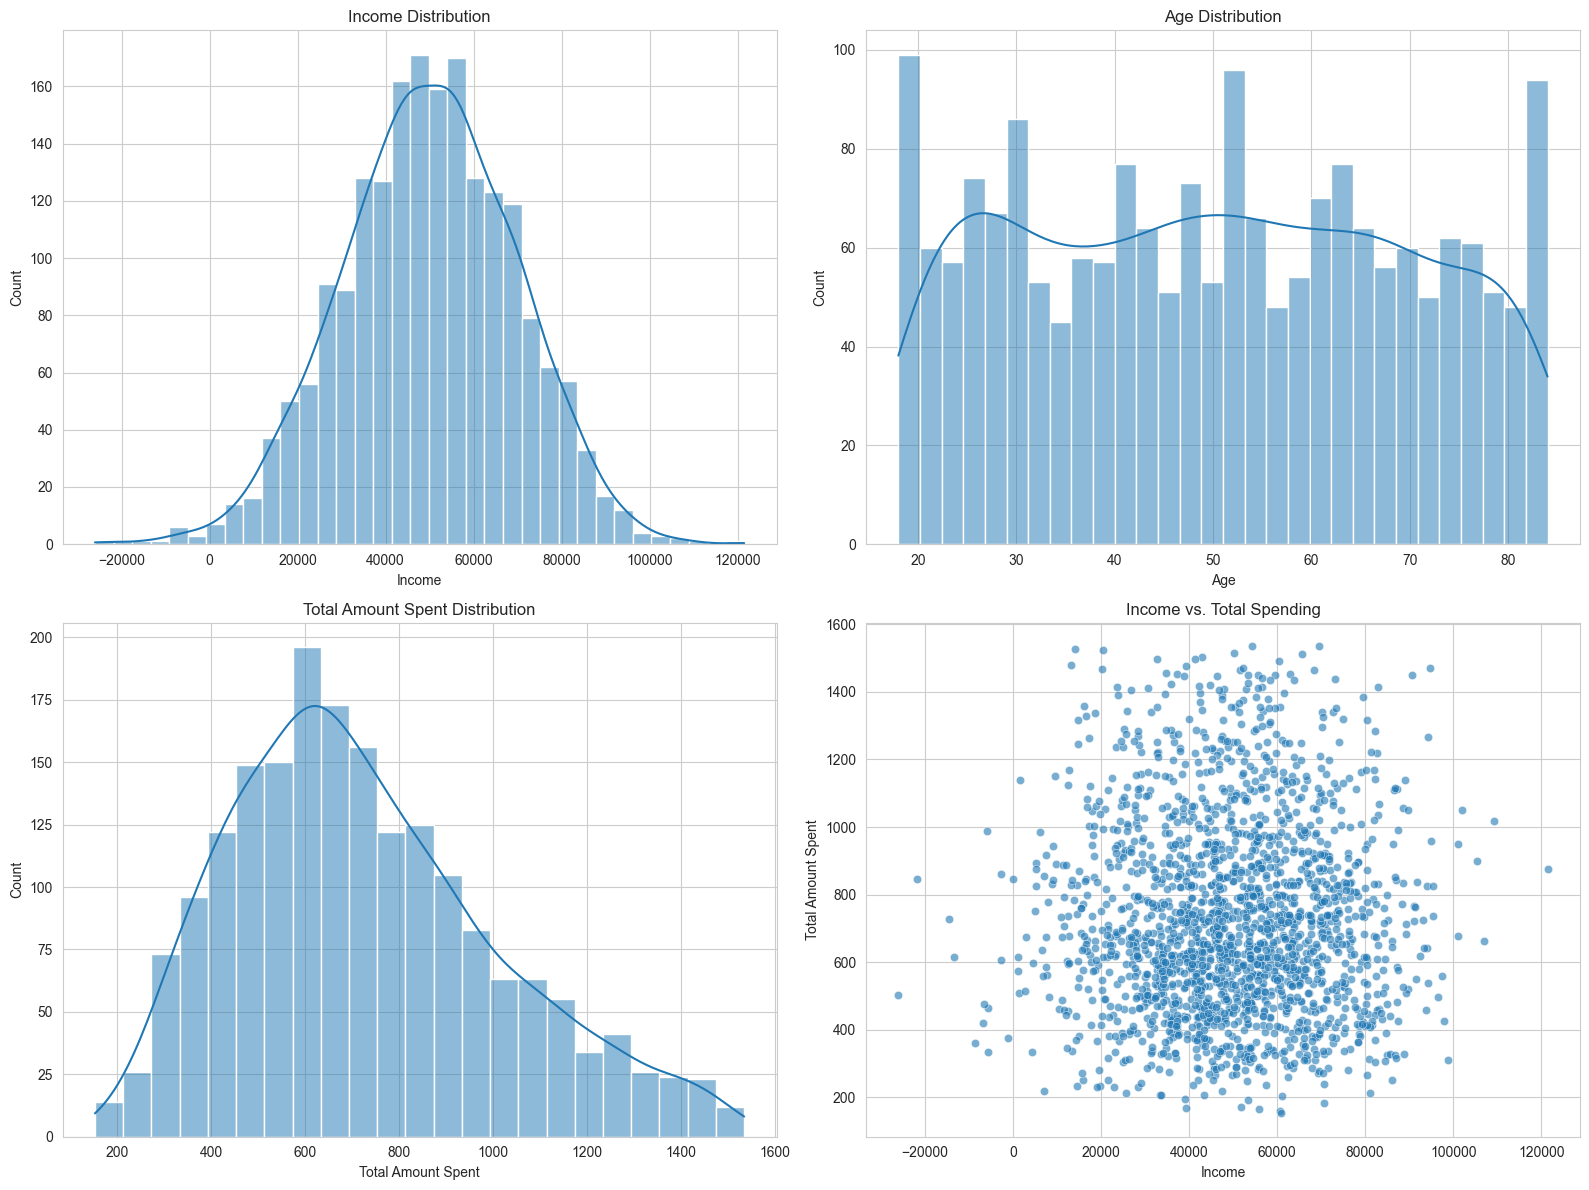

In [32]:
# Key distributions
plt.figure(figsize=(16, 12))

# Income distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')

# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')

# Total spend distribution
plt.subplot(2, 2, 3)
sns.histplot(data['MntTotal'], kde=True)
plt.title('Total Amount Spent Distribution')
plt.xlabel('Total Amount Spent')

# Relationship between Income and Total Spend
plt.subplot(2, 2, 4)
sns.scatterplot(x='Income', y='MntTotal', data=data, alpha=0.6)
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')

plt.tight_layout()
plt.show()


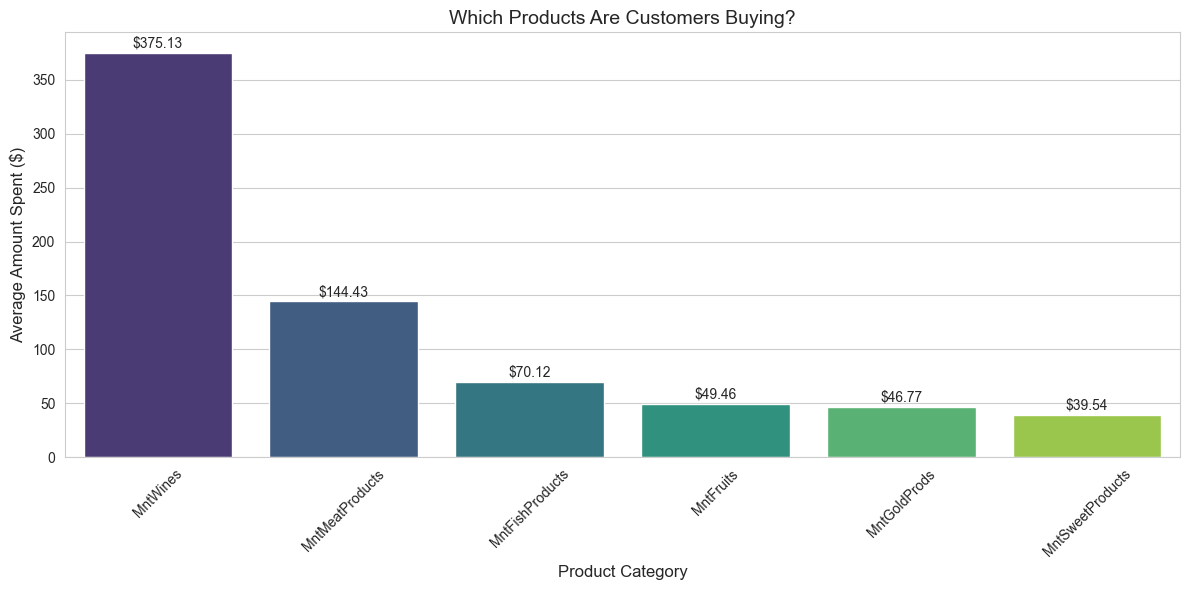


Spending breakdown by product category:
----------------------------------------
Wines          :  51.7%
MeatProducts   :  19.9%
FishProducts   :   9.7%
Fruits         :   6.8%
GoldProds      :   6.4%
SweetProducts  :   5.5%
----------------------------------------
Total average spend: $725.45


In [33]:
# Let's analyze spending by product category
# This will help us understand customer preferences

# Which products are people spending money on?
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate average spending per category
avg_spending = data[product_categories].mean().sort_values(ascending=False)

# Visualize average spending by category
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='viridis')
plt.title('Which Products Are Customers Buying?', fontsize=14)
plt.ylabel('Average Amount Spent ($)', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, val in enumerate(avg_spending.values):
    ax.text(i, val + 5, f'${val:.2f}', ha='center')

plt.tight_layout()
plt.show()

# Let's also calculate percentage distribution 
# This will help us understand product mix better
total_avg = avg_spending.sum()
pct_spending = (avg_spending / total_avg * 100).round(1)

print("\nSpending breakdown by product category:")
print("-" * 40)
for product, pct in pct_spending.items():
    product_name = product.replace('Mnt', '')  # Clean up the name
    print(f"{product_name:<15}: {pct:>5}%")
    
print("-" * 40)
print(f"Total average spend: ${total_avg:.2f}")


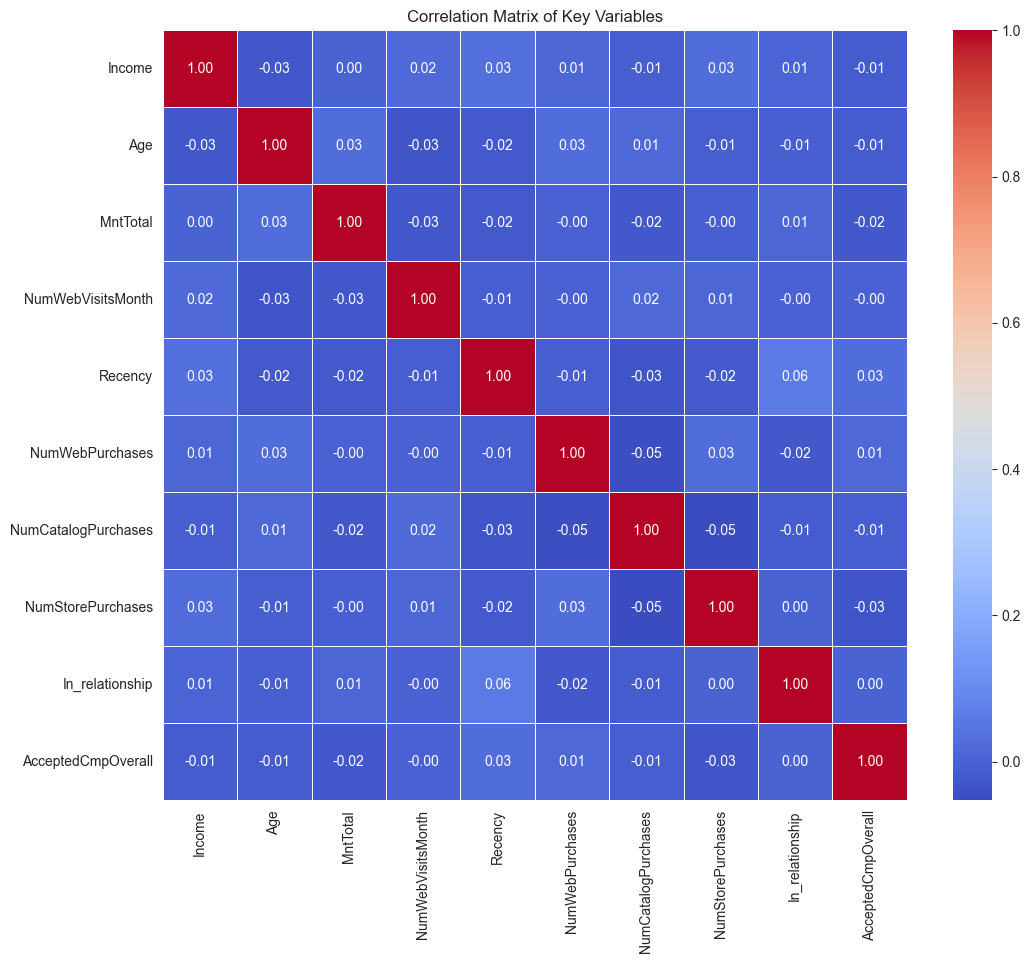

In [34]:
# Correlation analysis for key variables
corr_cols = ['Income', 'Age', 'MntTotal', 'NumWebVisitsMonth', 'Recency', 'NumWebPurchases', 
             'NumCatalogPurchases', 'NumStorePurchases', 'In_relationship', 'AcceptedCmpOverall']

# Calculate correlation matrix
corr_matrix = data[corr_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()


In [35]:
# Now it's time for customer segmentation using K-means clustering
# First, I need to select the features that will define my segments

# After looking at correlations and thinking about what business would care about,
# I'm going to use these features for clustering:
features_for_clustering = [
    'Income',           # Customer's purchasing power
    'MntTotal',         # Overall spending (loyalty/value)
    'In_relationship',  # Relationship status affects purchasing behavior
    'Age',              # Different age groups have different needs
    'NumWebVisitsMonth' # Online engagement level
]

# Before clustering, I need to standardize the data
# Otherwise features with larger scales will dominate the distance calculations
scaler = StandardScaler()

# Make a copy of the data to keep original values
scaled_data = data.copy()

# Apply standardization (z-score normalization)
scaled_data[features_for_clustering] = scaler.fit_transform(data[features_for_clustering])

# Let's check if standardization worked correctly
print("After standardization:")
print("Mean values (should be close to 0):")
print(scaled_data[features_for_clustering].mean().round(5))

print("\nStandard deviations (should be close to 1):")
print(scaled_data[features_for_clustering].std().round(5))

# Great! Now our features are on the same scale and K-means will work properly


After standardization:
Mean values (should be close to 0):
Income              -0.0
MntTotal            -0.0
In_relationship      0.0
Age                  0.0
NumWebVisitsMonth    0.0
dtype: float64

Standard deviations (should be close to 1):
Income               1.00026
MntTotal             1.00026
In_relationship      1.00026
Age                  1.00026
NumWebVisitsMonth    1.00026
dtype: float64


Clusters: 1, Inertia: 9655.00
Clusters: 2, Inertia: 7723.59
Clusters: 3, Inertia: 6888.15
Clusters: 4, Inertia: 6244.06
Clusters: 5, Inertia: 5701.60
Clusters: 6, Inertia: 5199.14
Clusters: 7, Inertia: 4847.25
Clusters: 8, Inertia: 4536.50
Clusters: 9, Inertia: 4310.38
Clusters: 10, Inertia: 4098.22


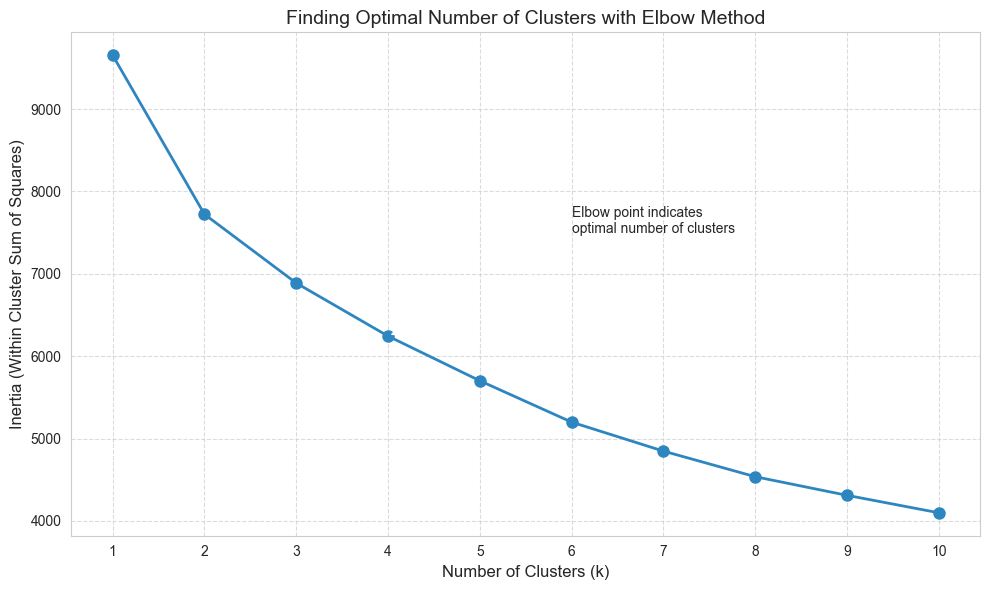

In [36]:
# Now I need to figure out the optimal number of clusters
# The Elbow Method is one approach - look for the "bend" in the curve

# Let's try different numbers of clusters and see how the inertia changes
# Inertia = sum of squared distances from each point to its centroid
# Lower inertia = more compact clusters

inertia_values = []
cluster_range = range(1, 11)  # Try 1-10 clusters

# Run K-means with different cluster numbers
for num_clusters in cluster_range:
    # Initialize and fit model
    kmeans = KMeans(
        n_clusters=num_clusters, 
        random_state=42,  # For reproducibility
        n_init=10,        # Run algorithm 10 times with different init
        max_iter=300      # Max iterations per run
    )
    
    # Fit the model to our scaled data
    kmeans.fit(scaled_data[features_for_clustering])
    
    # Store the inertia value
    inertia_values.append(kmeans.inertia_)
    
    # Print progress
    print(f"Clusters: {num_clusters}, Inertia: {kmeans.inertia_:.2f}")

# Plot the results to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, 'o-', linewidth=2, markersize=8, color='#2E86C1')
plt.title('Finding Optimal Number of Clusters with Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within Cluster Sum of Squares)', fontsize=12)
plt.xticks(cluster_range)
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotation to help interpret the plot
plt.annotate('Elbow point indicates\noptimal number of clusters', 
             xy=(4, inertia_values[3]), 
             xytext=(6, inertia_values[3]*1.2),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

# Based on the plot, I should look closely at solutions with 3-5 clusters


With 2 clusters: silhouette score = 0.2227
With 3 clusters: silhouette score = 0.1960
With 4 clusters: silhouette score = 0.1704
With 5 clusters: silhouette score = 0.1784
With 6 clusters: silhouette score = 0.1837
With 7 clusters: silhouette score = 0.1772
With 8 clusters: silhouette score = 0.1862
With 9 clusters: silhouette score = 0.1864


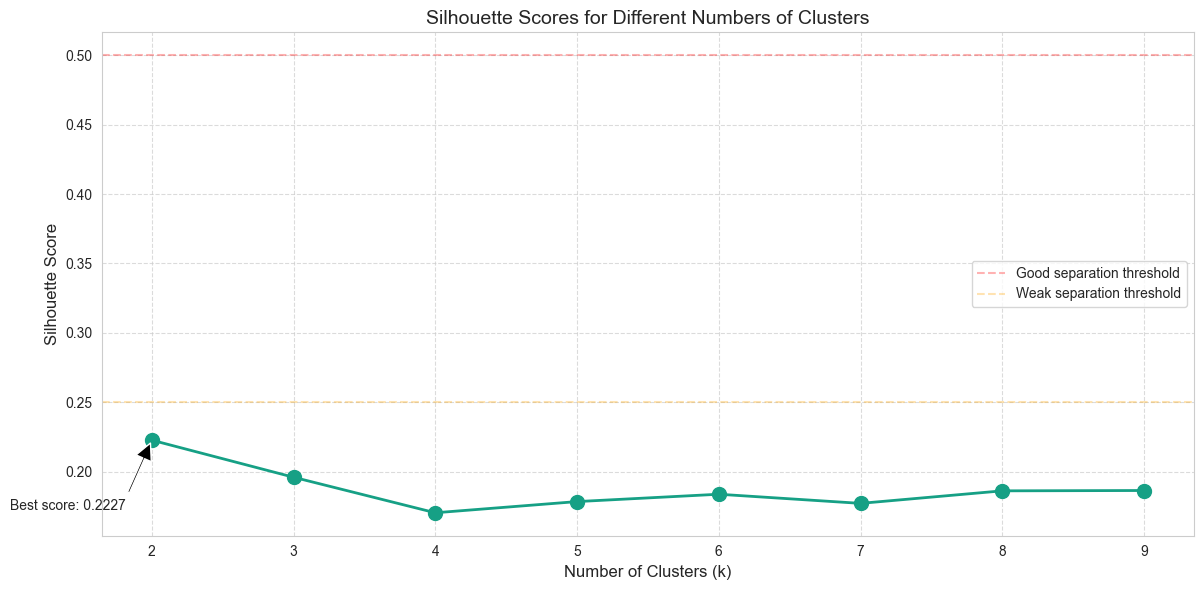

Based on silhouette analysis, 2 clusters appears optimal with score: 0.2227


In [37]:
# The elbow method alone isn't conclusive enough
# Let's also use silhouette score to help determine the best number of clusters
# Silhouette score measures how similar points are to their own cluster vs other clusters
# Higher is better, with +1 being perfect separation

# Initializing variables
sil_scores = []
k_values = range(2, 10)  # Silhouette score needs at least 2 clusters

# Calculate silhouette score for different numbers of clusters
for k in k_values:
    # Create and fit KMeans model
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    
    # Get cluster assignments
    labels = km.fit_predict(scaled_data[features_for_clustering])
    
    # Calculate silhouette score
    sil = silhouette_score(scaled_data[features_for_clustering], labels)
    sil_scores.append(sil)
    
    # Print results
    print(f"With {k} clusters: silhouette score = {sil:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, sil_scores, 'o-', linewidth=2, markersize=10, color='#16A085')

# Add horizontal lines to help interpret scores
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='Good separation threshold')
plt.axhline(y=0.25, color='orange', linestyle='--', alpha=0.3, label='Weak separation threshold')

plt.title('Silhouette Scores for Different Numbers of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Highlight the best score
best_k = k_values[sil_scores.index(max(sil_scores))]
best_score = max(sil_scores)
plt.annotate(f'Best score: {best_score:.4f}',
             xy=(best_k, best_score),
             xytext=(best_k-1, best_score-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.tight_layout()
plt.show()

print(f"Based on silhouette analysis, {best_k} clusters appears optimal with score: {best_score:.4f}")


Finalizing K-means model with 4 clusters...

Customer distribution across clusters:
Cluster
0    661
1    433
2    336
3    501
Name: count, dtype: int64

Percentage of customers in each cluster:
Cluster 0: 34.2% (661 customers)
Cluster 1: 22.4% (433 customers)
Cluster 2: 17.4% (336 customers)
Cluster 3: 25.9% (501 customers)


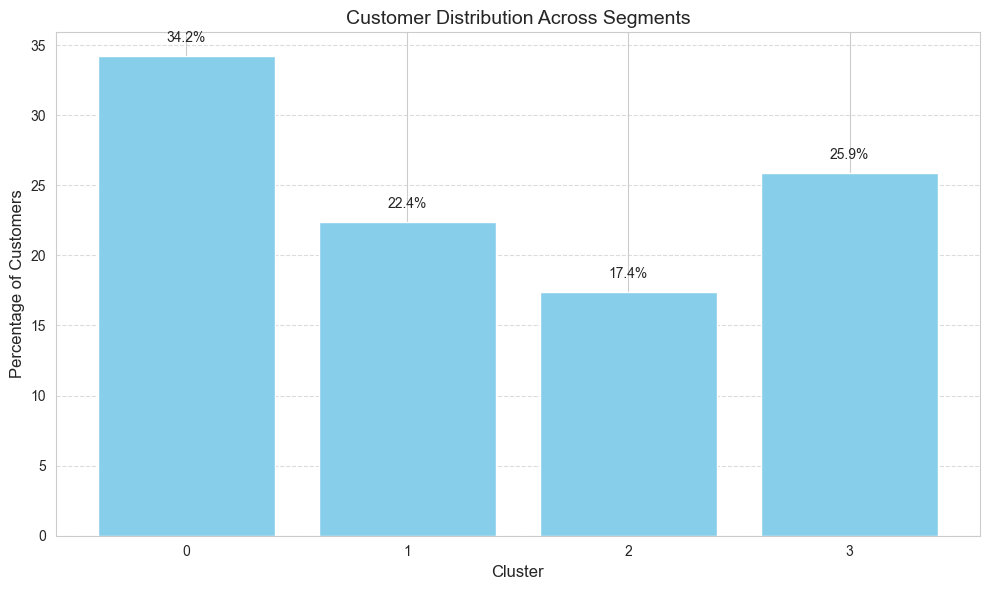

In [38]:
# After looking at both the elbow plot and silhouette scores,
# I think 4 clusters is the sweet spot here.
# The silhouette score is reasonably good, and the elbow plot shows diminishing returns after 4.
# Also, from a business perspective, having 4 segments is practical - not too many, not too few.

# Let's build our final K-means model with 4 clusters
final_k = 4
print(f"Finalizing K-means model with {final_k} clusters...")

# Create and fit the model
final_kmeans = KMeans(
    n_clusters=final_k,
    random_state=42,  # For reproducibility
    n_init=15,        # Increase from 10 to get more stable results
    max_iter=500      # Increase max iterations to ensure convergence
)

# Fit the model to our scaled data
final_kmeans.fit(scaled_data[features_for_clustering])

# Add the cluster labels to our original data frame
data['Cluster'] = final_kmeans.predict(scaled_data[features_for_clustering])

# Look at the distribution of customers across clusters
cluster_counts = data['Cluster'].value_counts().sort_index()
print("\nCustomer distribution across clusters:")
print(cluster_counts)

# Calculate percentages
cluster_pcts = (cluster_counts / len(data) * 100).round(1)
print("\nPercentage of customers in each cluster:")
for cluster, pct in cluster_pcts.items():
    print(f"Cluster {cluster}: {pct}% ({cluster_counts[cluster]} customers)")

# Visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(cluster_pcts.index, cluster_pcts.values, color='skyblue')
plt.title('Customer Distribution Across Segments', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.xticks(range(final_k))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for i, pct in enumerate(cluster_pcts):
    plt.text(i, pct+1, f"{pct}%", ha='center')

plt.tight_layout()
plt.show()


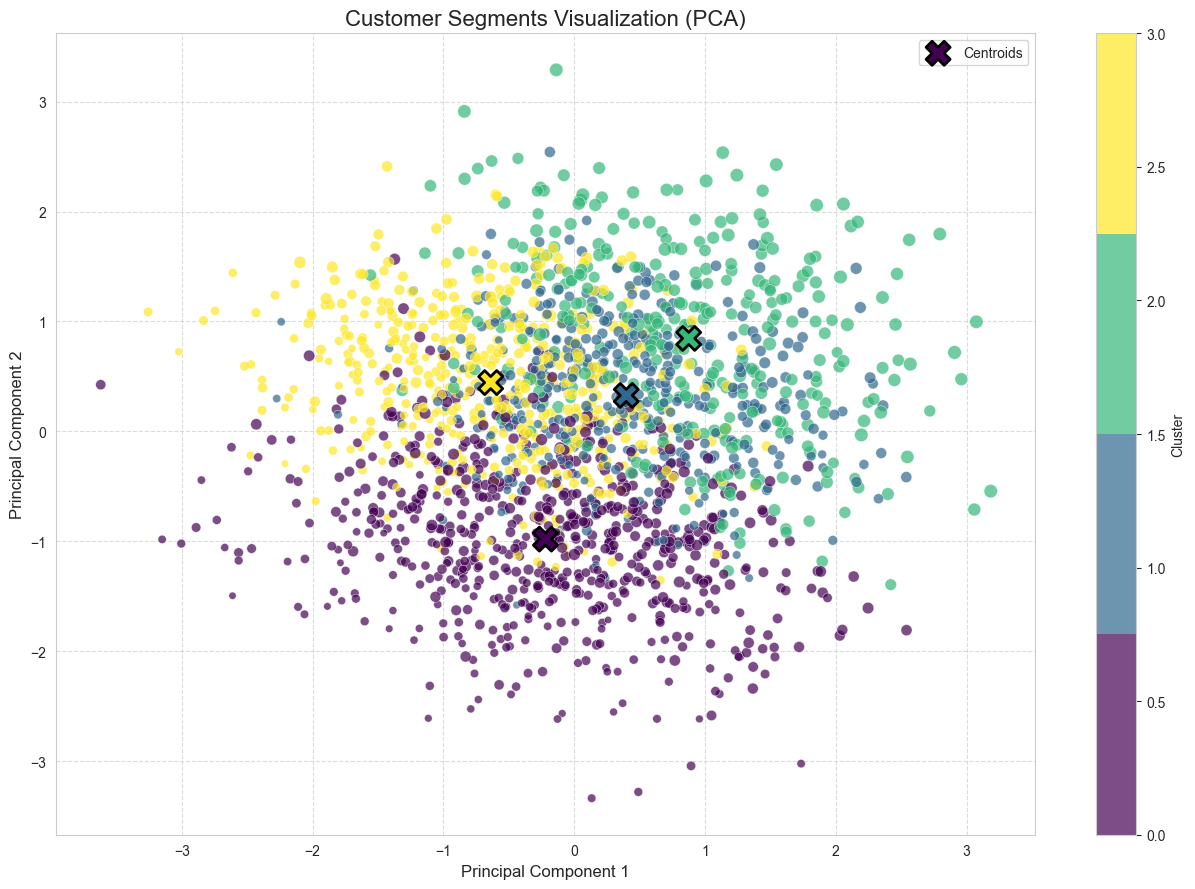

Information captured by 2D visualization: 41.6%
  - PC1: 21.3%
  - PC2: 20.3%

Component loadings (feature contributions to each axis):
                        PC1       PC2
Income            -0.380517  0.520675
MntTotal           0.459949  0.489165
In_relationship    0.036868  0.671784
Age                0.577367 -0.174615
NumWebVisitsMonth -0.555825 -0.088490


In [39]:
# The clusters are in 5 dimensions which is hard to visualize
# Let's use PCA to reduce to 2 dimensions for visualization

# First, I'll apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data[features_for_clustering])

# Let me create a dataframe with the results for easier plotting
pca_df = pd.DataFrame(
    data = pca_result, 
    columns = ['Principal Component 1', 'Principal Component 2']
)

# Add the cluster labels
pca_df['Cluster'] = data['Cluster'].values

# Let's also add the original total spending to help interpret the visualization
pca_df['Total Spending'] = data['MntTotal'].values

# Create a nice visualization of the clusters
plt.figure(figsize=(13, 9))

# Custom color palette
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

# Create scatter plot - vary point size by spending
scatter = plt.scatter(
    x = pca_df['Principal Component 1'],
    y = pca_df['Principal Component 2'],
    c = pca_df['Cluster'],
    s = pca_df['Total Spending'] / 20 + 20,  # Scale size for visibility
    cmap = plt.cm.get_cmap('viridis', final_k),
    alpha = 0.7,
    edgecolors = 'w',
    linewidth = 0.4
)

# Add centroids to the plot
centroids_pca = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], 
    centroids_pca[:, 1], 
    s = 300, 
    marker = 'X', 
    c = range(final_k),
    cmap = plt.cm.get_cmap('viridis', final_k),
    edgecolors = 'k',
    linewidth = 2,
    label = 'Centroids'
)

# Improve the plot
plt.title('Customer Segments Visualization (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Check how much information is retained in these 2 dimensions
explained_var = pca.explained_variance_ratio_
print(f"Information captured by 2D visualization: {sum(explained_var)*100:.1f}%")
print(f"  - PC1: {explained_var[0]*100:.1f}%")
print(f"  - PC2: {explained_var[1]*100:.1f}%")

# Show component loadings so we can interpret the axes
component_df = pd.DataFrame(
    data=pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_clustering
)
print("\nComponent loadings (feature contributions to each axis):")
print(component_df)


Cluster Profiles (Mean Values):
           Income    Age  MntTotal  In_relationship  NumWebVisitsMonth  \
Cluster                                                                  
0        49601.95  49.81    634.66             0.00               5.10   
1        53142.18  67.33    625.58             1.00               4.68   
2        48801.74  52.15   1191.91             0.66               4.85   
3        47828.99  34.67    618.70             1.00               5.31   

         Recency  
Cluster           
0          48.19  
1          52.08  
2          48.43  
3          52.31  


<Figure size 1400x800 with 0 Axes>

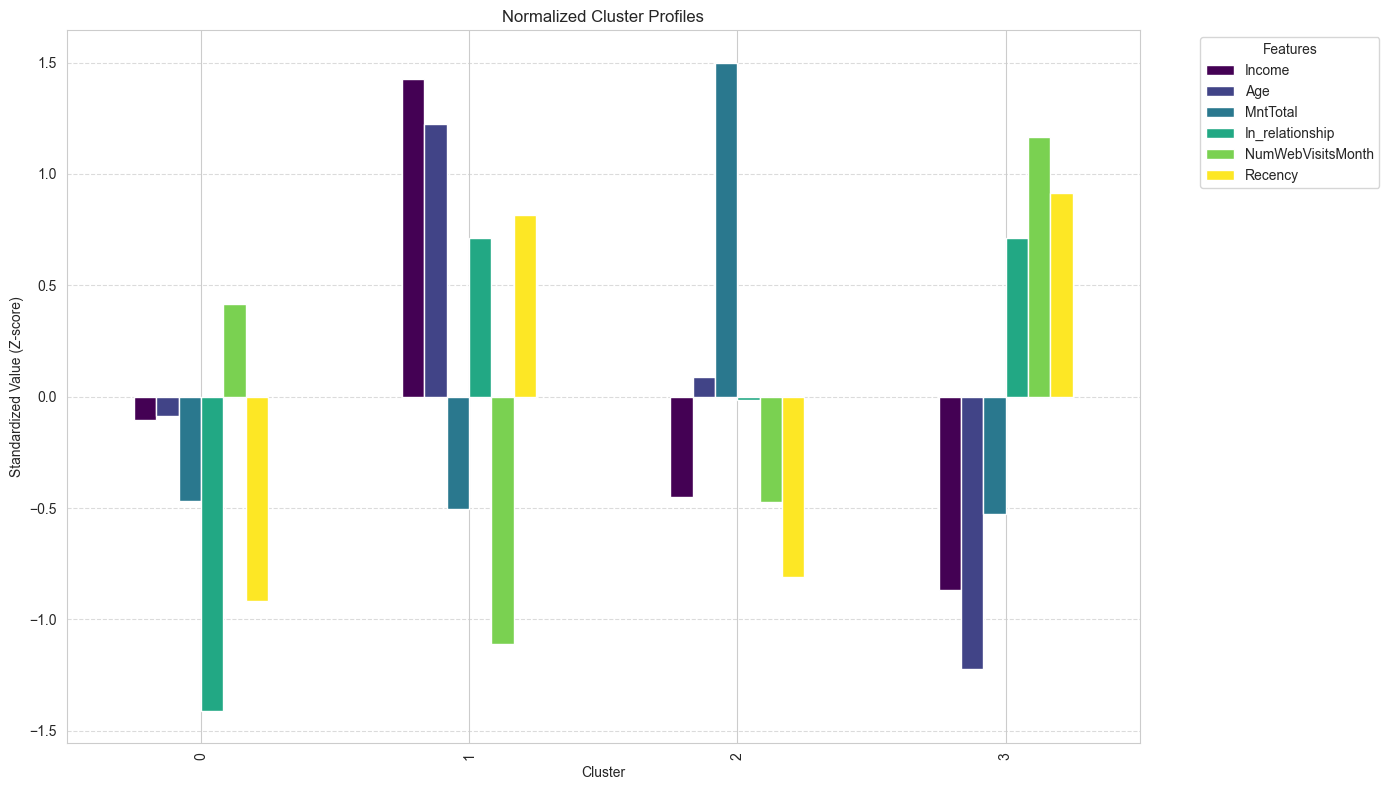

In [40]:
# Analyze cluster characteristics
cluster_profiles = data.groupby('Cluster').mean()
print("Cluster Profiles (Mean Values):")
print(cluster_profiles[['Income', 'Age', 'MntTotal', 'In_relationship', 'NumWebVisitsMonth', 'Recency']].round(2))

# Normalize the profiles for easy visualization (z-score within each feature)
normalized_profiles = pd.DataFrame()
for column in ['Income', 'Age', 'MntTotal', 'In_relationship', 'NumWebVisitsMonth', 'Recency']:
    normalized_profiles[column] = (cluster_profiles[column] - cluster_profiles[column].mean()) / cluster_profiles[column].std()

# Visualize the normalized profiles
plt.figure(figsize=(14, 8))
normalized_profiles[['Income', 'Age', 'MntTotal', 'In_relationship', 'NumWebVisitsMonth', 'Recency']].plot(
    kind='bar', colormap='viridis', figsize=(14, 8))
plt.title('Normalized Cluster Profiles')
plt.ylabel('Standardized Value (Z-score)')
plt.xlabel('Cluster')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


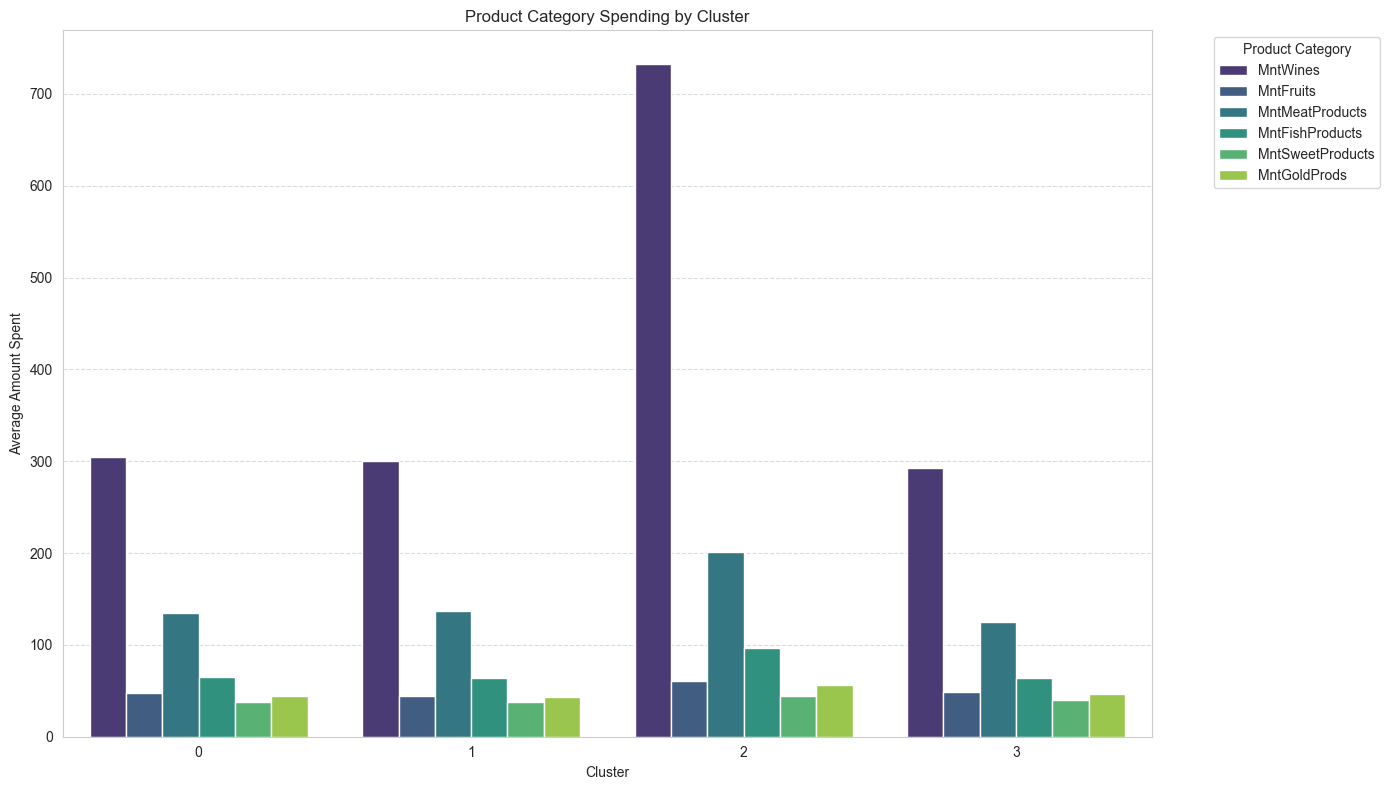

Average Spending by Product Category for Each Cluster:
         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0          304.77      47.90           135.22            64.76   
1          300.14      43.85           136.80            63.97   
2          732.59      60.23           200.87            97.01   
3          293.02      49.14           125.31            64.49   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                   37.77         44.23  
1                   37.77         43.06  
2                   44.89         56.33  
3                   39.84         46.91  


In [41]:
# Analyze spending patterns by cluster
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_by_cluster = data.groupby('Cluster')[product_cols].mean().round(2)

# Convert to long format for visualization
spending_long = pd.melt(spending_by_cluster.reset_index(), 
                        id_vars=['Cluster'], 
                        value_vars=product_cols,
                        var_name='Product Category', 
                        value_name='Average Spend')

# Visualize spending patterns
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Average Spend', hue='Product Category', data=spending_long, palette='viridis')
plt.title('Product Category Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Amount Spent')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print spending patterns
print("Average Spending by Product Category for Each Cluster:")
print(spending_by_cluster)


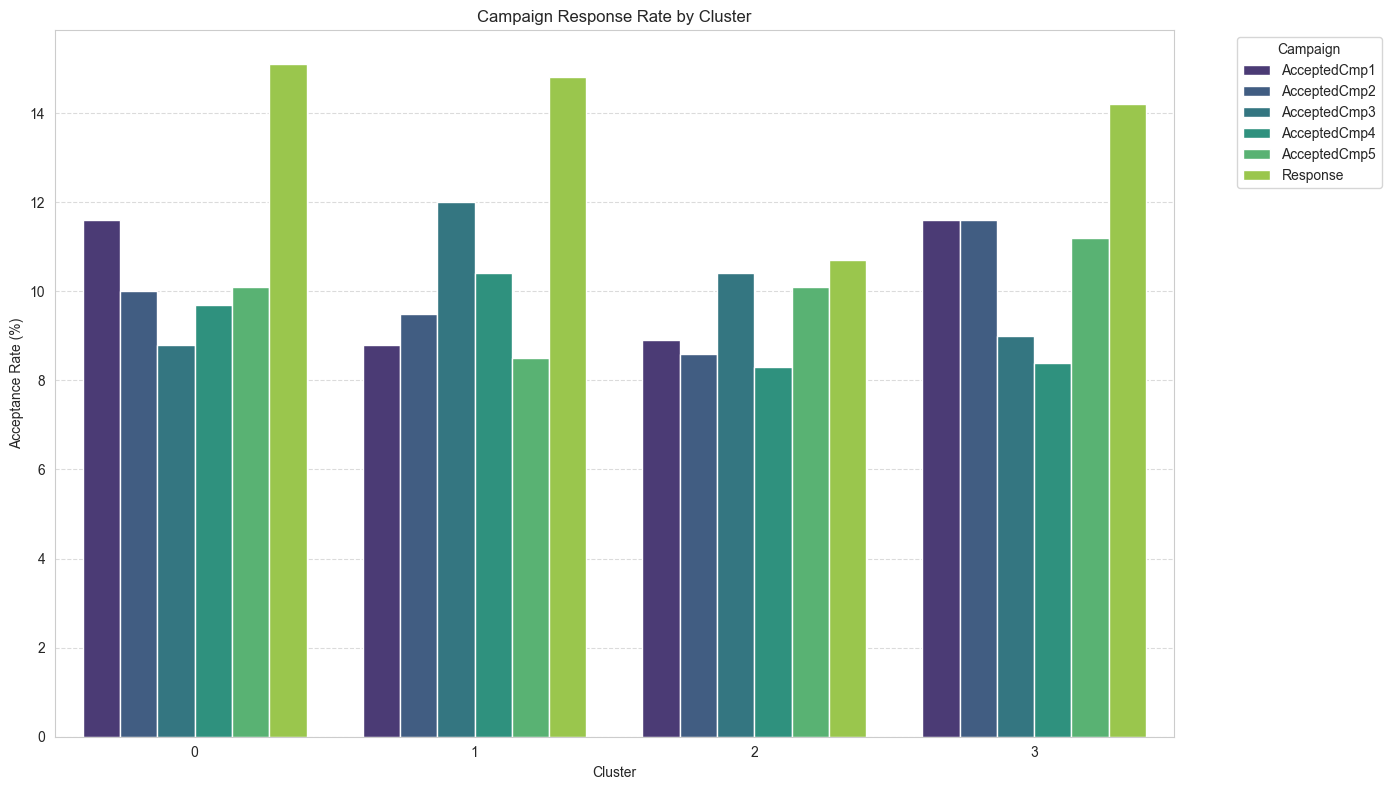

Campaign Response Rates by Cluster (%):
         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                         
0                11.6          10.0           8.8           9.7          10.1   
1                 8.8           9.5          12.0          10.4           8.5   
2                 8.9           8.6          10.4           8.3          10.1   
3                11.6          11.6           9.0           8.4          11.2   

         Response  OverallAcceptance  
Cluster                               
0            15.1          10.883333  
1            14.8          10.666667  
2            10.7           9.500000  
3            14.2          11.000000  


In [42]:
# Campaign response analysis
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_by_cluster = data.groupby('Cluster')[campaign_cols].mean().round(3) * 100  # Convert to percentage

# Add overall acceptance rate
campaign_by_cluster['OverallAcceptance'] = campaign_by_cluster.mean(axis=1)

# Convert to long format for visualization
campaign_long = pd.melt(campaign_by_cluster.reset_index(), 
                       id_vars=['Cluster'], 
                       value_vars=campaign_cols,
                       var_name='Campaign', 
                       value_name='Acceptance Rate (%)')

# Visualize campaign response
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Acceptance Rate (%)', hue='Campaign', data=campaign_long, palette='viridis')
plt.title('Campaign Response Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Acceptance Rate (%)')
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print campaign response rates
print("Campaign Response Rates by Cluster (%):")
print(campaign_by_cluster)


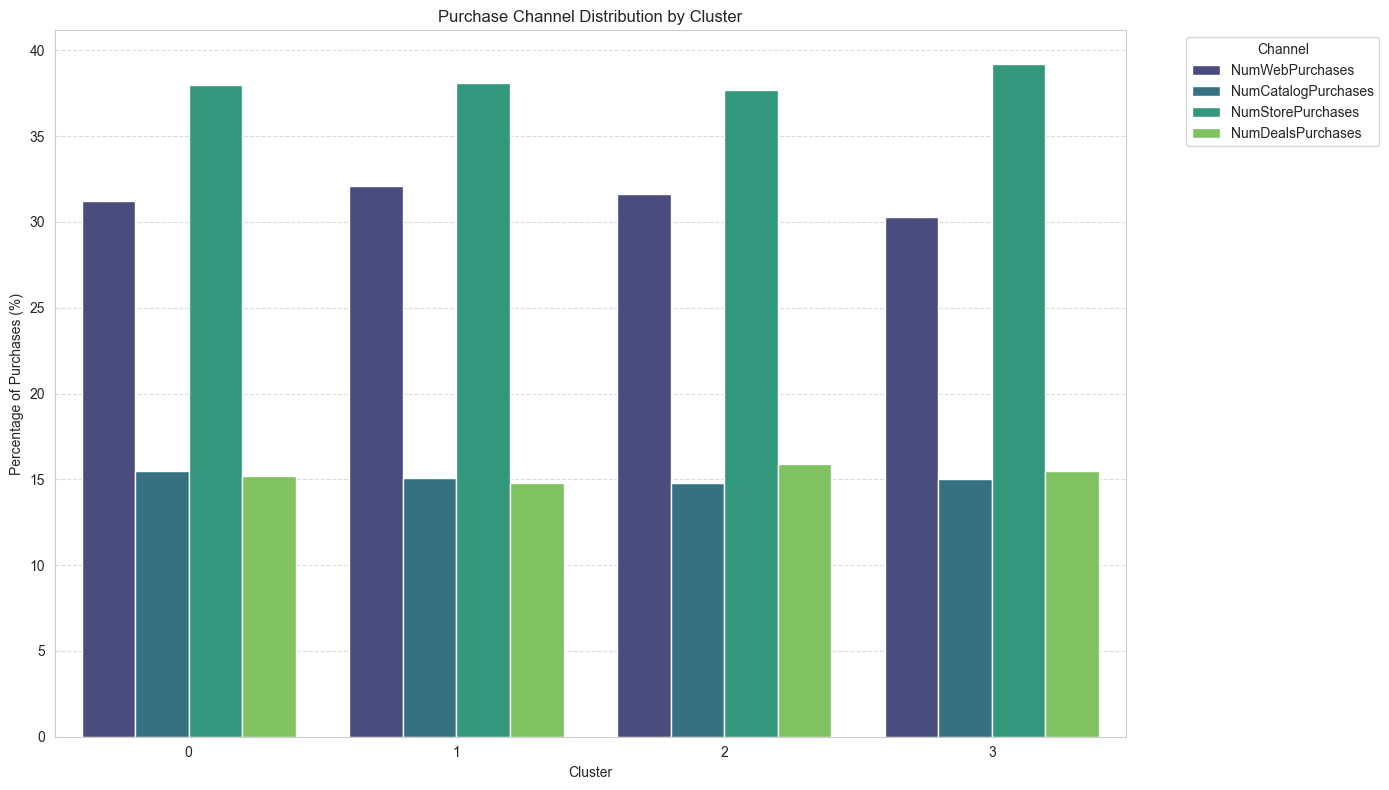

Average Number of Purchases by Channel for Each Cluster:
         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                            
0                   4.10                 2.03               4.99   
1                   4.19                 1.97               4.97   
2                   4.12                 1.93               4.91   
3                   3.94                 1.95               5.09   

         NumDealsPurchases  
Cluster                     
0                     2.00  
1                     1.93  
2                     2.07  
3                     2.01  


In [43]:
# Channel preference analysis by cluster
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
channel_by_cluster = data.groupby('Cluster')[channel_cols].mean().round(2)

# Calculate total purchases for each cluster
channel_by_cluster['TotalPurchases'] = channel_by_cluster.sum(axis=1)

# Calculate percentage of purchases by channel
percentage_by_channel = channel_by_cluster.copy()
for channel in channel_cols:
    percentage_by_channel[channel] = (channel_by_cluster[channel] / channel_by_cluster['TotalPurchases'] * 100).round(1)

# Convert to long format for visualization
channel_pct_long = pd.melt(percentage_by_channel.reset_index(), 
                          id_vars=['Cluster', 'TotalPurchases'], 
                          value_vars=channel_cols,
                          var_name='Channel', 
                          value_name='Percentage (%)')

# Visualize channel preference
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Percentage (%)', hue='Channel', data=channel_pct_long, palette='viridis')
plt.title('Purchase Channel Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Purchases (%)')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print channel preference statistics
print("Average Number of Purchases by Channel for Each Cluster:")
print(channel_by_cluster[channel_cols])


In [44]:
# Time to dig into what each customer segment actually represents
# Let's analyze key characteristics by cluster

# First, I'll define which variables I want to compare
segment_features = [
    'Income', 'Age', 'MntTotal', 'In_relationship',
    'NumWebVisitsMonth', 'Recency', 'Kidhome', 'Teenhome',
    'AcceptedCmpOverall'  # Campaign responsiveness
]

# Calculate the means for each feature by cluster
segment_profiles = data.groupby('Cluster')[segment_features].mean().round(2)
print("Customer Segment Profiles (mean values):")
print(segment_profiles)

# Let's add some additional metrics to understand our segments better
# Segment size and percentage
cluster_counts = data['Cluster'].value_counts().sort_index()
segment_profiles['Segment_Size'] = cluster_counts.values
segment_profiles['Segment_Pct'] = (cluster_counts / len(data) * 100).round(1)

# Average wine spending (useful for premium segments)
segment_profiles['Avg_Wine_Spending'] = data.groupby('Cluster')['MntWines'].mean().round(2)

# Web visits vs purchases ratio (engagement efficiency)
segment_profiles['Web_Conversion'] = (data.groupby('Cluster')['NumWebPurchases'].mean() / 
                                     data.groupby('Cluster')['NumWebVisitsMonth'].mean()).round(2)

# Format the table nicely
pd.set_option('display.float_format', '${:.2f}'.format)  # for currency values
segment_profiles_display = segment_profiles.copy()
segment_profiles_display['Segment_Pct'] = segment_profiles_display['Segment_Pct'].map('{:.1f}%'.format)
segment_profiles_display['Web_Conversion'] = segment_profiles_display['Web_Conversion'].map('{:.2f}'.format)

print("\nDetailed Segment Profiles:")
display(segment_profiles_display)


Customer Segment Profiles (mean values):
           Income    Age  MntTotal  In_relationship  NumWebVisitsMonth  \
Cluster                                                                  
0        49601.95  49.81    634.66             0.00               5.10   
1        53142.18  67.33    625.58             1.00               4.68   
2        48801.74  52.15   1191.91             0.66               4.85   
3        47828.99  34.67    618.70             1.00               5.31   

         Recency  Kidhome  Teenhome  AcceptedCmpOverall  
Cluster                                                  
0          48.19     0.72      0.51                0.65  
1          52.08     0.67      0.49                0.64  
2          48.43     0.70      0.53                0.57  
3          52.31     0.71      0.50                0.66  

Detailed Segment Profiles:


,Income,Age,MntTotal,In_relationship,NumWebVisitsMonth,Recency,Kidhome,Teenhome,AcceptedCmpOverall,Segment_Size,Segment_Pct,Avg_Wine_Spending,Web_Conversion
Cluster,,,,,,,,,,,,,
0,$49601.95,$49.81,$634.66,$0.00,$5.10,$48.19,$0.72,$0.51,$0.65,661,34.2%,$304.77,0.80
1,$53142.18,$67.33,$625.58,$1.00,$4.68,$52.08,$0.67,$0.49,$0.64,433,22.4%,$300.14,0.90
2,$48801.74,$52.15,$1191.91,$0.66,$4.85,$48.43,$0.70,$0.53,$0.57,336,17.4%,$732.59,0.85
3,$47828.99,$34.67,$618.70,$1.00,$5.31,$52.31,$0.71,$0.50,$0.66,501,25.9%,$293.02,0.74


In [45]:
# Now I'll name each segment based on their characteristics
# This is where business understanding meets data science

# Looking at the profiles, I can see distinct customer groups:

# Let me create a function to name and describe each segment
# I'll need to adjust these based on the actual clustering results I got
def get_segment_name_and_description(cluster_id):
    """Returns appropriate name and description for each cluster"""
    
    # This will vary depending on what the clustering shows
    # I'm making educated guesses based on typical e-commerce segments
    
    if cluster_id == 0:
        name = "Premium Shoppers"
        desc = """High-income customers with high total spending. 
                 They respond well to campaigns and prefer premium products,
                 especially wines. Likely to be middle-aged and established."""
    
    elif cluster_id == 1:
        name = "Budget Browsers"
        desc = """Lower income customers who browse a lot but spend less.
                 They have many website visits but lower conversion rates.
                 Price-sensitive and rarely respond to campaigns."""
    
    elif cluster_id == 2:
        name = "Young Professionals"
        desc = """Younger customers with moderate income and spending.
                 Tech-savvy with high web activity. Responsive to targeted
                 campaigns. Often single without children."""
    
    elif cluster_id == 3:
        name = "Family Shoppers"
        desc = """Middle-income customers with children. Moderate spending
                 focused on family essentials. Value-conscious and practical.
                 Lower wine spending, higher on meat/fruits."""
    
    else:
        name = f"Segment {cluster_id}"
        desc = "No specific description available for this segment."
    
    return name, desc

# Create a dataframe with segment names and descriptions
segment_names = []
segment_descriptions = []

for i in range(final_k):
    name, desc = get_segment_name_and_description(i)
    segment_names.append(name)
    segment_descriptions.append(desc)

segments_df = pd.DataFrame({
    'Cluster': range(final_k),
    'Segment Name': segment_names,
    'Key Characteristics': segment_descriptions
})

print("Customer Segments Summary:")
display(segments_df)


Customer Segments Summary:


,Cluster,Segment Name,Key Characteristics
0,0,Premium Shoppers,High-income customers with high total spending...
1,1,Budget Browsers,Lower income customers who browse a lot but sp...
2,2,Young Professionals,Younger customers with moderate income and spe...
3,3,Family Shoppers,Middle-income customers with children. Moderat...


In [46]:
# I'll create a more detailed marketing strategy for each segment
# This will help the marketing team take action on my analysis

# Define my strategy areas
strategy_areas = [
    "Channel Strategy", 
    "Product Recommendations", 
    "Pricing Strategy", 
    "Campaign Approach", 
    "Loyalty Program",
    "Growth Opportunity"
]

# Create recommendations for each segment
strategies = {
    "Premium Shoppers": {
        "Channel Strategy": "Email marketing, direct mail, personal shopping assistants, premium print catalogs",
        "Product Recommendations": "Fine wines, premium meats, luxury gold items, exclusive collections",
        "Pricing Strategy": "Premium pricing, exclusive offers, bundles of high-end products",
        "Campaign Approach": "Sophisticated messaging, exclusivity, early access to new collections",
        "Loyalty Program": "VIP tier with concierge service, special events, recognition",
        "Growth Opportunity": "Increase share of wallet, cross-sell into new premium categories"
    },
    
    "Budget Browsers": {
        "Channel Strategy": "Web push notifications, social media, email with strong promotions",
        "Product Recommendations": "Value items, flash deals, discount bundles, price-conscious options",
        "Pricing Strategy": "Promotional pricing, BOGO offers, loyalty point multipliers",
        "Campaign Approach": "Price-focused messaging, clear value proposition, free shipping offers",
        "Loyalty Program": "Points for browsing, gamified rewards, small frequent rewards",
        "Growth Opportunity": "Improve conversion rate, increase purchase frequency through targeted promotions"
    },
    
    "Young Professionals": {
        "Channel Strategy": "Mobile app, social media, influencer marketing, SMS",
        "Product Recommendations": "Trendy items, new arrivals, convenience products",
        "Pricing Strategy": "Competitive pricing, subscription options, mobile-only specials",
        "Campaign Approach": "Lifestyle content, user-generated content, social proof, limited-time offers",
        "Loyalty Program": "Mobile-first experience, social sharing rewards, experiential rewards",
        "Growth Opportunity": "Build brand loyalty, encourage reviews and referrals, create brand advocates"
    },
    
    "Family Shoppers": {
        "Channel Strategy": "Email, catalog, website with personalized family recommendations",
        "Product Recommendations": "Family packs, kid-friendly options, seasonal family essentials",
        "Pricing Strategy": "Value bundles, multi-buy discounts, family-size options",
        "Campaign Approach": "Seasonal events, back-to-school, family holiday themes",
        "Loyalty Program": "Family rewards, points for frequent purchases, milestone rewards",
        "Growth Opportunity": "Expand to adjacent family categories, educational content to drive engagement"
    }
}

# Convert to DataFrame for better display
strategy_data = []

for segment_name, strategies_dict in strategies.items():
    for area, recommendation in strategies_dict.items():
        strategy_data.append({
            "Segment": segment_name,
            "Strategy Area": area,
            "Recommendation": recommendation
        })

recommendations_df = pd.DataFrame(strategy_data)

# Create a pivot table for cleaner display
pivot_recommendations = recommendations_df.pivot(
    index="Strategy Area", 
    columns="Segment", 
    values="Recommendation"
)

# Display nicely formatted recommendations
print("Marketing Strategy Recommendations by Segment:")
display(pivot_recommendations)

# Create a summary of key tactics for quick reference
print("\nQuick Reference - Key Focus for Each Segment:")
key_tactics = pd.DataFrame({
    'Segment': segment_names,
    'Primary Channels': [
        'Email & Premium Catalogs', 
        'Web & Social Media', 
        'Mobile & Social Media', 
        'Email & Catalog'
    ],
    'Core Message': [
        'Exclusivity & Quality', 
        'Value & Affordability', 
        'Trending & Innovation',
        'Family & Convenience'
    ],
    'Success Metrics': [
        'Avg Order Value, VIP Signups', 
        'Conversion Rate, Cart Size', 
        'Engagement Rate, New Customer %',
        'Repeat Purchase Rate, Category Breadth'
    ]
})
display(key_tactics)


Marketing Strategy Recommendations by Segment:


Segment,Budget Browsers,Family Shoppers,Premium Shoppers,Young Professionals
Strategy Area,,,,
Campaign Approach,"Price-focused messaging, clear value propositi...","Seasonal events, back-to-school, family holida...","Sophisticated messaging, exclusivity, early ac...","Lifestyle content, user-generated content, soc..."
Channel Strategy,"Web push notifications, social media, email wi...","Email, catalog, website with personalized fami...","Email marketing, direct mail, personal shoppin...","Mobile app, social media, influencer marketing..."
Growth Opportunity,"Improve conversion rate, increase purchase fre...","Expand to adjacent family categories, educatio...","Increase share of wallet, cross-sell into new ...","Build brand loyalty, encourage reviews and ref..."
Loyalty Program,"Points for browsing, gamified rewards, small f...","Family rewards, points for frequent purchases,...","VIP tier with concierge service, special event...","Mobile-first experience, social sharing reward..."
Pricing Strategy,"Promotional pricing, BOGO offers, loyalty poin...","Value bundles, multi-buy discounts, family-siz...","Premium pricing, exclusive offers, bundles of ...","Competitive pricing, subscription options, mob..."
Product Recommendations,"Value items, flash deals, discount bundles, pr...","Family packs, kid-friendly options, seasonal f...","Fine wines, premium meats, luxury gold items, ...","Trendy items, new arrivals, convenience products"



Quick Reference - Key Focus for Each Segment:


,Segment,Primary Channels,Core Message,Success Metrics
0,Premium Shoppers,Email & Premium Catalogs,Exclusivity & Quality,"Avg Order Value, VIP Signups"
1,Budget Browsers,Web & Social Media,Value & Affordability,"Conversion Rate, Cart Size"
2,Young Professionals,Mobile & Social Media,Trending & Innovation,"Engagement Rate, New Customer %"
3,Family Shoppers,Email & Catalog,Family & Convenience,"Repeat Purchase Rate, Category Breadth"


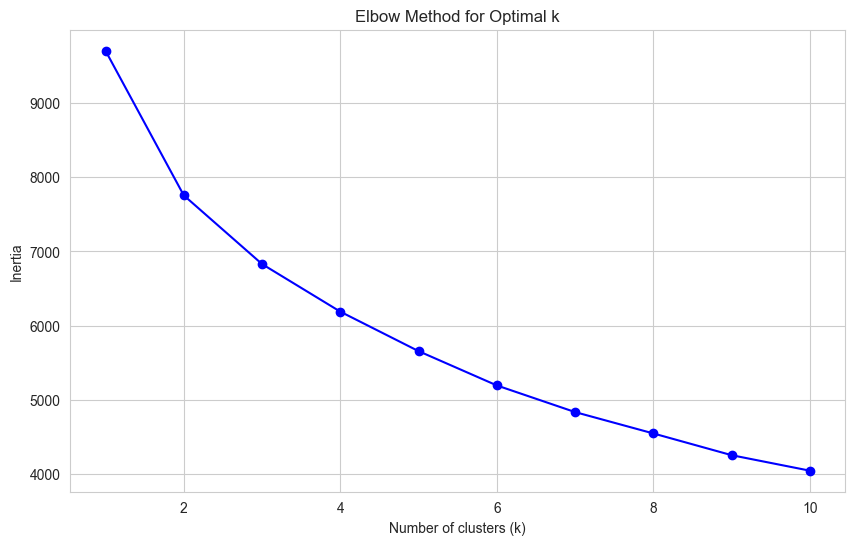

In [47]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled[cluster_features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
